# Aadarsh Goyal
## MIS: 111915001
## ------------------------------------------------------------------------------------------------------------------------

## Import basic Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
df = df.drop('User ID',axis=1)

## Lets do some data visualization

Text(0.5, 0, 'Age')

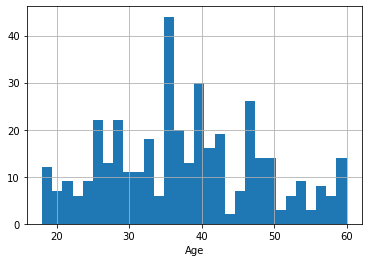

In [5]:
df['Age'].hist(bins=30)
plt.xlabel('Age')

<AxesSubplot:xlabel='Purchased', ylabel='count'>

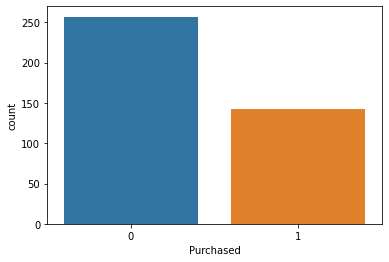

In [6]:
sns.countplot(data=df,x='Purchased')

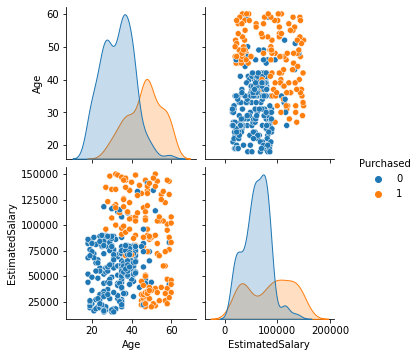

In [7]:
sns.pairplot(data = df, hue='Purchased')

## Convert categorical to numerical

In [8]:
Sex  = pd.get_dummies(df['Gender'] , drop_first = True)

In [9]:
df['Sex'] = Sex
df = df.drop('Gender' , axis =1)

## Lets do data test train split 

In [10]:
X = df.drop('Purchased',axis=1)
y = df['Purchased']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train  ,X_test , y_train , y_test = train_test_split( X , y , test_size = 0.3 , random_state = 50)

In [12]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Now, applying logistic regression to the model

In [13]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

In [14]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

## Now that training, lets see the performance of the model

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [16]:
y_pred = log_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.85

In [17]:
confusion_matrix(y_test,y_pred)

array([[77,  3],
       [15, 25]], dtype=int64)

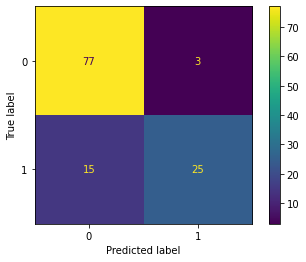

In [18]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

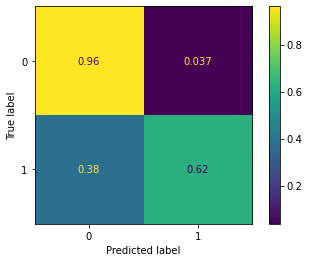

In [19]:
# Scaled so highest value=1
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        80
           1       0.89      0.62      0.74        40

    accuracy                           0.85       120
   macro avg       0.86      0.79      0.82       120
weighted avg       0.86      0.85      0.84       120

